# Burger's equation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Space
L = 10.0     
nx = 101    
dx = L/(nx-1)   
x = np.linspace(0, L, nx)

# Define the initial condition
u_initial = 10*np.exp(-(x-5)**2)

# Time
cf = 0.5
t_final = 0.5
dt = cf * dx/np.max(u_initial) 
t_final_values = [t_final/10,t_final/2,t_final]

print('Number of iterations=',t_final/dt)

Number of iterations= 100.0


In [3]:
solutions_nc = []
solutions_c = []

In [4]:
def ConservativeUpwind(u) :
    u_next = u - dt/(dx)*(0.5*u**2 - 0.5*np.roll(u, 1)**2)
    return u_next

def NonConservativeUpwind(u) :
    u_next =  u - u*dt/(dx)*(u - np.roll(u, 1)) 
    return u_next

# Conservative

In [5]:
# Initialize the solution array
u_current = u_initial.copy()

t = 0

while t <= t_final+dt :
    
    if any(abs(t - val) < dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions_c.append(u_current.copy())

    u_next = ConservativeUpwind(u_current)
    u_current = u_next.copy()
    
    t = t + dt
    
u_conservative = u_current

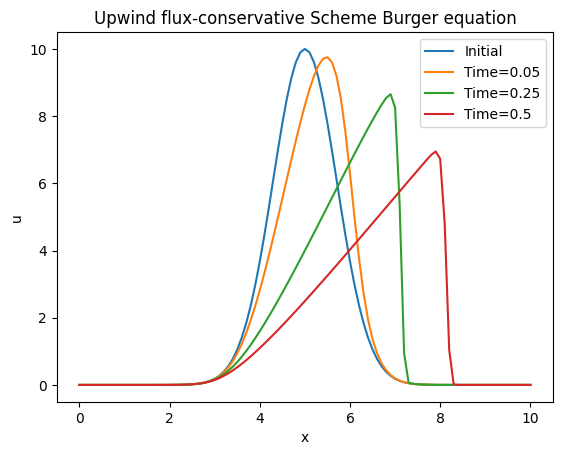

In [6]:
# Plot the final solution
plt.title('Upwind flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_c[0], label='Time=' + str(t_final_values[0]))
plt.plot(x, solutions_c[1], label='Time=' + str(t_final_values[1]))
plt.plot(x, solutions_c[2], label='Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger FC.png')
plt.show()

# Non conservative

In [7]:
# Initialize the solution array
u_current = u_initial.copy()

t = 0

while t <= t_final + dt :
    
    # Check if t is in t_final_values
    if any(abs(t - val) < dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions_nc.append(u_current.copy())
    
    u_next = NonConservativeUpwind(u_current)
    u_current = u_next.copy()
    
    t = t + dt

u_non_conservative = u_current

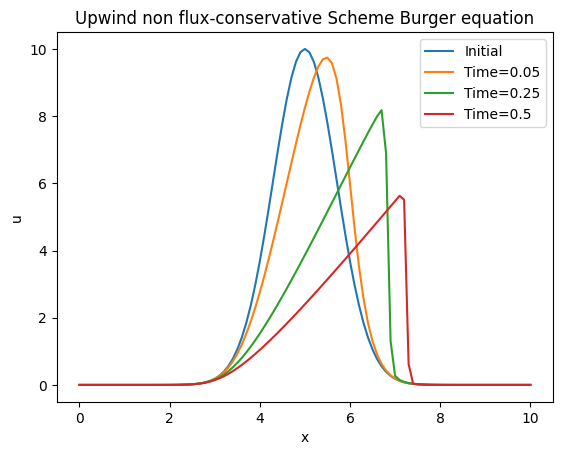

In [8]:
# Plot the final solution
plt.title('Upwind non flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_nc[0], label='Time=' + str(t_final_values[0]))
plt.plot(x, solutions_nc[1], label='Time=' + str(t_final_values[1]))
plt.plot(x, solutions_nc[2], label='Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger FNC.png')
plt.show()

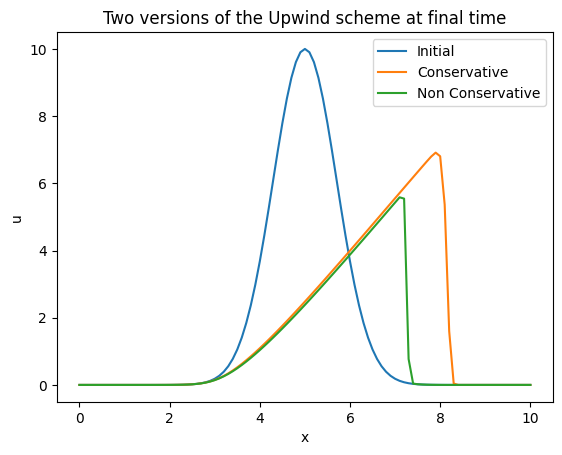

In [9]:
plt.title('Two versions of the Upwind scheme at final time')
plt.plot(x, u_initial, label='Initial')
plt.plot(x,u_conservative,label='Conservative')
plt.plot(x,u_non_conservative,label='Non Conservative')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

# Final Plots

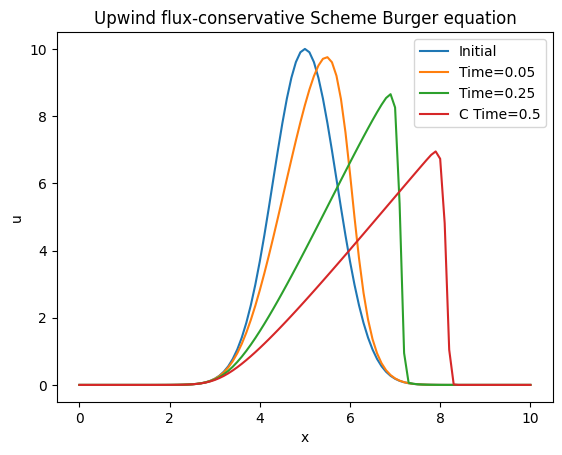

In [10]:
# Plot the final solution
plt.title('Upwind flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_c[0], label='Time=' + str(t_final_values[0]))
plt.plot(x, solutions_c[1], label='Time=' + str(t_final_values[1]))
plt.plot(x, solutions_c[2], label='C Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig('Burger FC.png')
plt.show()

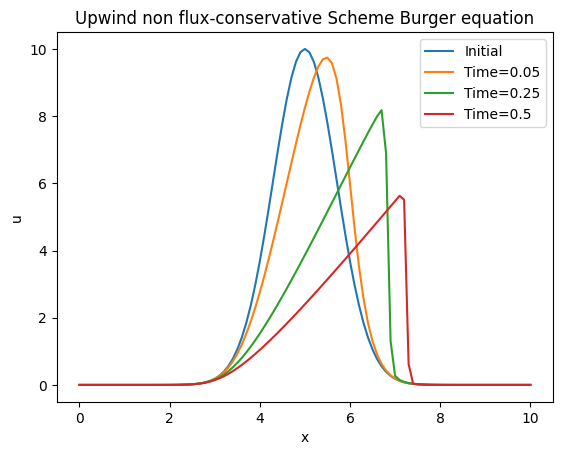

In [11]:
# Plot the final solution
plt.title('Upwind non flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_nc[0], label='Time=' + str(t_final_values[0]))
plt.plot(x, solutions_nc[1], label='Time=' + str(t_final_values[1]))
plt.plot(x, solutions_nc[2], label='Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig('Burger FNC.png')
plt.show()

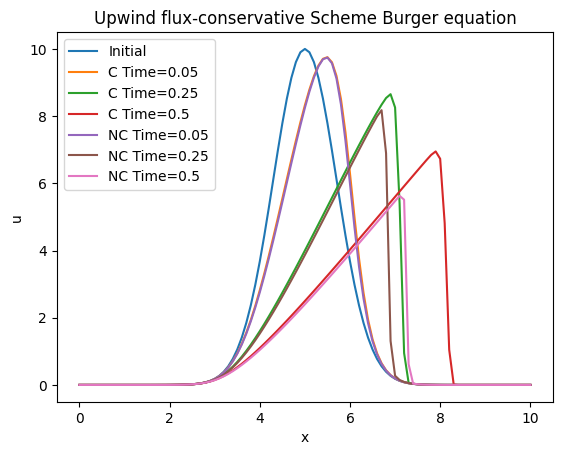

In [12]:
# Plot the final solution
plt.title('Upwind flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_c[0], label='C Time=' + str(t_final_values[0]))
plt.plot(x, solutions_c[1], label='C Time=' + str(t_final_values[1]))
plt.plot(x, solutions_c[2], label='C Time=' + str(t_final_values[2]))
plt.plot(x, solutions_nc[0], label='NC Time=' + str(t_final_values[0]))
plt.plot(x, solutions_nc[1], label='NC Time=' + str(t_final_values[1]))
plt.plot(x, solutions_nc[2], label='NC Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger.png')
plt.show()

# Increasing the resolution

In [13]:
# Space
L = 10.0     
nx = 201    
dx = L/(nx-1)   
x2 = np.linspace(0, L, nx)

# Define the initial condition
u_initial2 = 10*np.exp(-(x2-5)**2)

# Time
cf = 0.5
t_final = 0.5
dt = cf * dx/np.max(u_initial) 
t_final_values = [t_final/10,t_final/2,t_final]

print(dx)
print('Number of iterations=',t_final/dt)

0.05
Number of iterations= 200.0


In [14]:
print(x)
print(x2)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55
  3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95

In [15]:
solutions_nc2 = []
solutions_c2 = []

In [16]:
def ConservativeUpwind2(u2) :
    u_next = u2 - dt/(dx)*(0.5*u2**2 - 0.5*np.roll(u2, 1)**2)
    return u_next

def NonConservativeUpwind2(u2) :
    u_next =  u2 - u2*dt/(dx)*(u2 - np.roll(u2, 1)) 
    return u_next

In [17]:
# Initialize the solution array
u_current = u_initial2.copy()

t = 0

while t <= t_final + dt :
    
    if any(abs(t - val) < dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions_c2.append(u_current.copy())
        
    u_next = ConservativeUpwind2(u_current)
    u_current = u_next.copy()
    
    t = t + dt

u_conservative2 = u_current

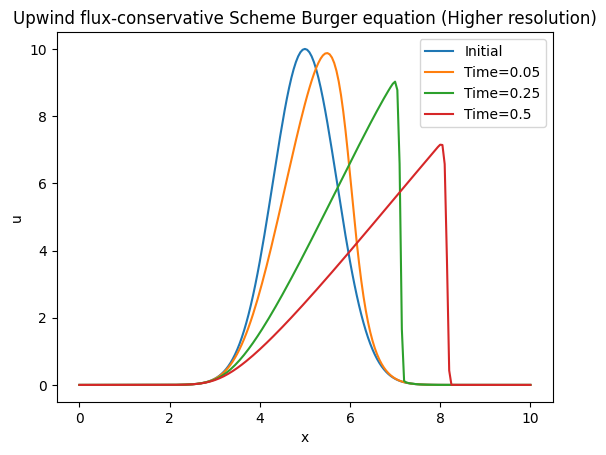

In [18]:
# Plot the final solution
plt.title('Upwind flux-conservative Scheme Burger equation (Higher resolution)')
plt.plot(x2, u_initial2, label='Initial')

plt.plot(x2, solutions_c2[0], label='Time=' + str(t_final_values[0]))
plt.plot(x2, solutions_c2[1], label='Time=' + str(t_final_values[1]))
plt.plot(x2, solutions_c2[2], label='Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger FC.png')
plt.show()

In [19]:
# Initialize the solution array
u_current = u_initial2.copy()

t = 0

while t <= t_final + dt :
    
    # Check if t is in t_final_values
    if any(abs(t - val) < dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions_nc2.append(u_current.copy())
        
    u_next = NonConservativeUpwind2(u_current)
    u_current = u_next.copy()
    
    t = t + dt

u_non_conservative2 = u_current

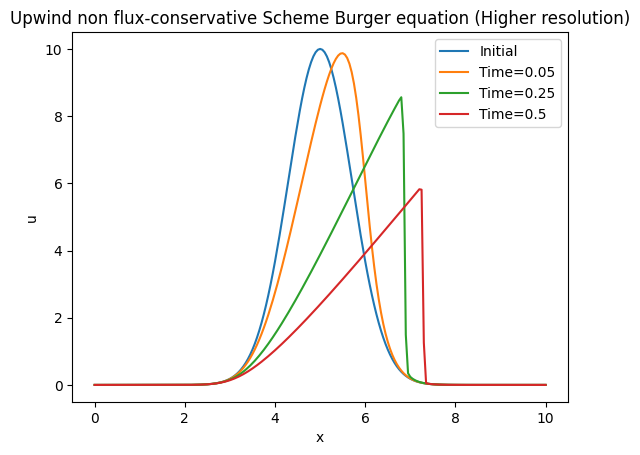

In [20]:
# Plot the final solution
plt.title('Upwind non flux-conservative Scheme Burger equation (Higher resolution)')
plt.plot(x2, u_initial2, label='Initial')

plt.plot(x2, solutions_nc2[0], label='Time=' + str(t_final_values[0]))
plt.plot(x2, solutions_nc2[1], label='Time=' + str(t_final_values[1]))
plt.plot(x2, solutions_nc2[2], label='Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger FNC.png')
plt.show()

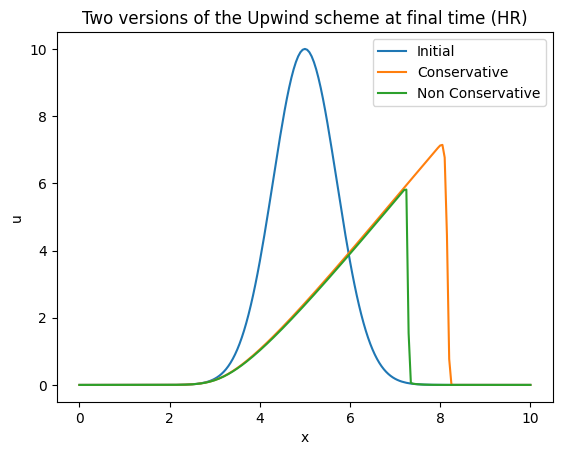

In [21]:
plt.title('Two versions of the Upwind scheme at final time (HR)')
plt.plot(x2, u_initial2, label='Initial')
plt.plot(x2,u_conservative2,label='Conservative')
plt.plot(x2,u_non_conservative2,label='Non Conservative')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

## Resolution Plots

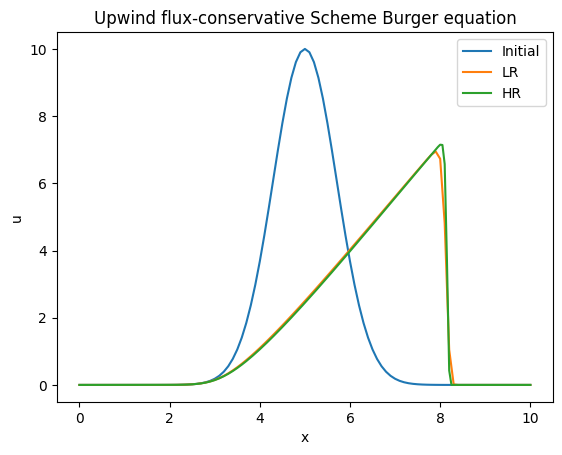

In [22]:
# Plot the final solution
plt.title('Upwind flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_c[2], label='LR')
plt.plot(x2, solutions_c2[2], label='HR')

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger FC.png')
plt.show()

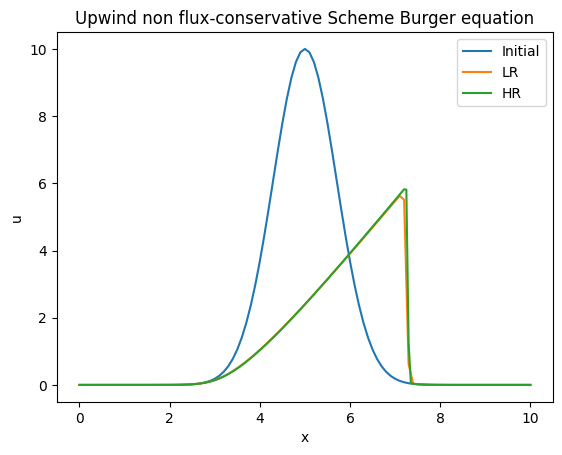

In [23]:
# Plot the final solution
plt.title('Upwind non flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_nc[2], label='LR')
plt.plot(x2, solutions_nc2[2], label='HR')

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger FNC.png')
plt.show()

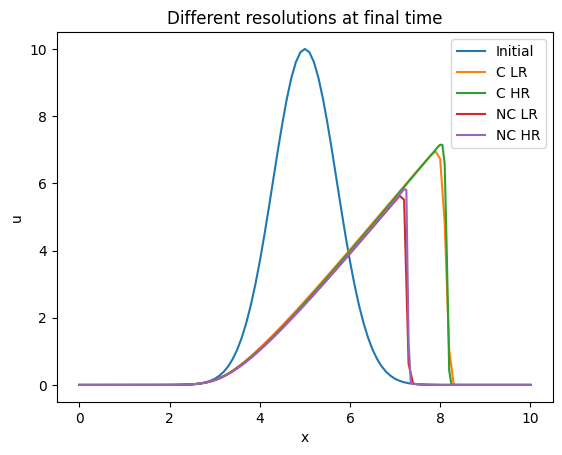

In [24]:
# Plot the final solution
plt.title('Different resolutions at final time')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_c[2], label='C LR')
plt.plot(x2, solutions_c2[2], label='C HR')
plt.plot(x, solutions_nc[2], label='NC LR')
plt.plot(x2, solutions_nc2[2], label='NC HR')

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig('Burger Resolution final.png')
plt.show()